### Image classification

we will use the fashion mnist data in this part.

In [1]:
%pylab inline

import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

from PIL import Image

Populating the interactive namespace from numpy and matplotlib


C:\Users\nikhi\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Process Data

In [3]:
# =============================
#  Reshaping data
# ============================
import tensorflow as tf
import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


### Model Structure
In this section, we build a deep CNN to classify the fashion mnist image. The model structure is as follow:
#1 Convoluntional layer 1:
  - 32 filter
  - kernel_size=[3,3]
  - stride=1
  - no padding
  - activation function: relu
  
#2 Convoluntional layer 2:
  - 32 filter
  - kernel_size=[3,3]
  - stride=1
  - no padding
  - activation function: relu
 
#3 MaxPooling Layer 1: 
  - pool_size=2
 
#4 dropout

#5 Fully connected layer with 64 hidden nodes
  - activation function: ReLU

#6 Fully connected layer to the output layer
  - 10 outputs
  - activation function: softmax
  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                294976    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total para

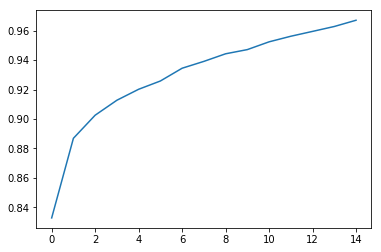

In [3]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
#model.add(Activation(tf.nn.softmax))
print(model.summary())


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_training = model.fit(X_train, Y_train,
          epochs=15,
          batch_size=128,
         verbose = 0)

plt.plot(model_training.history["acc"])



In [4]:
# =====================
#  Evaluating the model
# =====================
score_train = model.evaluate(X_train, Y_train, verbose=1)
score_test = model.evaluate(X_test, Y_test, verbose=1)


10000/10000 [==============================] - 10s 1ms/step


(60000, 28, 28, 1)

In [6]:
print("loss on the training set: ", score_train[0])
print("accuracy on the training set: ", score_train[1])

print("loss on the test set: ", score_test[0])
print("accuracy on the test set: ", score_test[1])


loss on the training set:  0.05678995476091901
accuracy on the training set:  0.9809666666666667
loss on the test set:  0.259400545167923
accuracy on the test set:  0.9212


### Transfer Learning

In [2]:
from keras.applications import VGG16
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import RMSprop

In [3]:
import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
from PIL import Image

In [5]:
path_train_data = "mnist/train/"
X_train_resize=[]
basewidth=48
baseheight=48
for i in range(60000):
    img=Image.fromarray(X_train[i,:,:])
    img = img.resize((basewidth,baseheight), Image.ANTIALIAS)
    #img.save(path_train_data+str(i+1)+".jpg")
    img_array=np.array(img)
    #print(img_array.shape)
    X_train_resize.append(img_array)

In [6]:
path_train_data = "mnist/test/"
X_test_resize=[]
basewidth=48
baseheight=48
for i in range(10000):
    img=Image.fromarray(X_test[i,:,:])
    img = img.resize((basewidth,baseheight), Image.ANTIALIAS)
    #img.save(path_train_data+str(i+1)+".jpg")
    img_array=np.array(img)
    #print(img_array.shape)
    X_test_resize.append(img_array)

In [7]:
np.array(X_train_resize).shape

(60000, 48, 48)

In [8]:
X_train=np.repeat(np.array(X_train_resize)[:,:,:,np.newaxis],3,axis=3)/255
X_test=np.repeat(np.array(X_test_resize)[:,:,:,np.newaxis],3,axis=3)/255

In [9]:
X_train.shape


(60000, 48, 48, 3)

In [10]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [30]:
conv_base =VGG16(weights="imagenet",include_top=False,input_shape=(48,48,3))
#conv_base=keras.applications.mobilenet.MobileNet(input_shape=(32,32,3),include_top=False, weights='imagenet')
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()
model.trainable_weights
conv_base.trainable = False


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 14,848,586
Trainable params: 14,848,586
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.trainable_weights
model.compile(loss="categorical_crossentropy", optimizer=RMSprop(1e-4),metrics=["acc"])

In [16]:
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)




In [32]:
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    steps_per_epoch=200, epochs=20)


Epoch 1/20
200/200 [==============================] - 156s 780ms/step - loss: 1.6931 - acc: 0.5344
Epoch 2/20
200/200 [==============================] - 155s 775ms/step - loss: 1.0438 - acc: 0.7194
Epoch 3/20
200/200 [==============================] - 154s 768ms/step - loss: 0.8363 - acc: 0.7395
Epoch 4/20
200/200 [==============================] - 151s 756ms/step - loss: 0.7461 - acc: 0.7502
Epoch 5/20
200/200 [==============================] - 151s 757ms/step - loss: 0.7151 - acc: 0.7566
Epoch 6/20
200/200 [==============================] - 155s 775ms/step - loss: 0.6644 - acc: 0.7728
Epoch 7/20
200/200 [==============================] - 157s 784ms/step - loss: 0.6467 - acc: 0.7728
Epoch 8/20
200/200 [==============================] - 158s 792ms/step - loss: 0.6463 - acc: 0.7678
Epoch 9/20
200/200 [==============================] - 157s 785ms/step - loss: 0.5891 - acc: 0.7920
Epoch 10/20
200/200 [==============================] - 156s 782ms/step - loss: 0.5886 - acc: 0.7906
Epoch 11/

In [36]:
result=model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 386s 39ms/step


In [37]:
print(" accuracy on test data is: "+ str(result[1]))

 accuracy on test data is: 0.826
